In [98]:
import pandas as pd
import tmplot as tmp
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from statistics import mean
from statsmodels.tsa.stattools import adfuller
sns.set_theme(palette="pastel")

In [99]:
work_dir = "D:/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data"

In [100]:
comments_df = pd.read_json(work_dir + "/Comment/comments_with-sentiment.json")
replies_df = pd.read_json(work_dir + "/Comment/replies_with-sentiment.json")

In [101]:
video_topics = pd.read_csv(work_dir + "/Video/video_topics.csv")

In [102]:
print(video_topics.head())

   topic     video_id                                              title  \
0      2  vYzSzy6IwRI  E-AUTO mit 100% WASSERKRAFT laden | Prototyp n...   
1      2  Ad8knG-9l2A  Breaking Elektro-News: Xiaomi plant Elektroaut...   
2      1  SVyPVVXFpkU  Model 3 Facelift (SR & LR): Analyse der Tests ...   
3      3  z67yc8r2WNw  Probleme und Mängel an meinem Audi E-Tron, Upd...   
4      0  71SbVFBhaZk  STAT E-STICS #12 | KIA EV6 und alle Elektroaut...   

           published_at                channel_id  view_count  like_count  \
0  2021-04-01T08:00:27Z  UCaCaZ-vKtnMG2_FKmEePChQ      4217.0       493.0   
1  2021-04-01T05:00:02Z  UCsNdsFTTBj5jcRJSWeJ8-Xg      7432.0       613.0   
2  2021-04-01T16:15:55Z  UCasePAQ_q7tbUGybICCj4NQ      5530.0       342.0   
3  2021-04-02T17:11:32Z  UCddkvrnYqGRfODPMUQqisiw      6389.0       291.0   
4  2021-04-02T15:30:01Z  UCDDj2GWklzZ09X7R9OtsX3Q     38400.0       508.0   

   comment_count  job  id  valid  \
0            193    0   0  valid   
1       

In [103]:
print(comments_df.head())
print(replies_df.head())

   level_0  index  table_id     video_id  job page       date      author  \
0        0      0     10061  kjwiFMxRotQ   85      2022-03-08  Car Maniac   
1        1      1     10062  kjwiFMxRotQ   85      2022-03-08      Dennis   
2        2      2     10063  kjwiFMxRotQ   85      2022-03-08   Karl Napp   
3        3      3     10064  kjwiFMxRotQ   85      2022-03-08       Ed Sa   
4        4      4     10065  kjwiFMxRotQ   85      2022-03-08  MetalJaska   

   likes   published     updated  reply_count                  comment_id  \
0    437  2022-02-25  2022-02-25          108  UgxrA7-S9AiWwCGK8nh4AaABAg   
1      0  2022-03-08  2022-03-08            0  UgwlX0wQuL4vSc2dUu14AaABAg   
2      1  2022-03-08  2022-03-08            0  UgwxGcXqAkDNrle96V54AaABAg   
3      0  2022-03-08  2022-03-08            0  Ugzo6Qq8uCYpTJKGZFZ4AaABAg   
4      0  2022-03-08  2022-03-08            0  UgyHMgEX65XJeuwXlBZ4AaABAg   

                                             comment  \
0  <b>Liebe Freund

In [104]:
merged_comments = pd.merge(video_topics,comments_df,on='video_id',how='right')


merged_replies = pd.merge(video_topics,replies_df,on='video_id',how='right')

In [105]:
def f(row):
    float_compound = float(row['compound'])
    if float_compound >= 0.05:
        val = 'Positive'
    elif float_compound <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val

In [214]:
merged_comments['sentiment'] = merged_comments.apply(f, axis=1)
merged_replies['sentiment'] = merged_replies.apply(f, axis=1)

In [215]:
merged_comments['published'] = pd.to_datetime(merged_comments['published'], errors='coerce')
merged_replies['published'] = pd.to_datetime(merged_replies['published'], errors='coerce')


merged_comments['published'] = merged_comments['published'].dt.strftime('%d-%m-%Y')
merged_replies['published'] = merged_replies['published'].dt.strftime('%d-%m-%Y')
print(merged_comments['published'])
print(merged_replies['published'])

D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-

D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Programs\Conda\envs\thesis-jupyter\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-02-

0         25-02-2022
1         03-08-2022
2         03-08-2022
3         03-08-2022
4         03-08-2022
             ...    
532519    30-07-2021
532520    30-07-2021
532521    30-07-2021
532522    30-07-2021
532523    30-07-2021
Name: published, Length: 532524, dtype: object
0         03-06-2022
1         03-04-2022
2         03-03-2022
3         03-03-2022
4         03-06-2022
             ...    
400777    08-03-2021
400778    08-03-2021
400779    30-07-2021
400780    30-07-2021
400781    30-07-2021
Name: published, Length: 400782, dtype: object


In [216]:
topic_0_df = merged_comments.loc[merged_comments['topic'] == 0]
topic_1_df = merged_comments.loc[merged_comments['topic'] == 1]
topic_2_df = merged_comments.loc[merged_comments['topic'] == 2]
topic_3_df = merged_comments.loc[merged_comments['topic'] == 3]

topic_0 = topic_0_df.groupby(['sentiment']).size()
topic_1 = topic_1_df.groupby(['sentiment']).size()
topic_2 = topic_2_df.groupby(['sentiment']).size()
topic_3 = topic_3_df.groupby(['sentiment']).size()

positive_0 = topic_0['Positive']
positive_1 = topic_1['Positive'] 
positive_2 = topic_2['Positive'] 
positive_3 = topic_3['Positive'] 

neutral_0 = topic_0['Neutral']
neutral_1 = topic_1['Neutral']
neutral_2 = topic_2['Neutral']
neutral_3 = topic_3['Neutral']

negative_0 = topic_0['Negative']
negative_1 = topic_1['Negative']
negative_2 = topic_2['Negative']
negative_3 = topic_3['Negative']

topic_labels = ['Positive', 'Neutral', 'Negative' ]
topic_0_data = [positive_0, neutral_0, negative_0]
topic_1_data = [positive_1, neutral_1, negative_1]
topic_2_data = [positive_2, neutral_2, negative_2]
topic_3_data = [positive_3, neutral_3, negative_3]

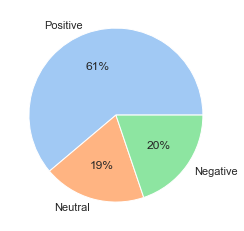

In [109]:
plt.pie(topic_0_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

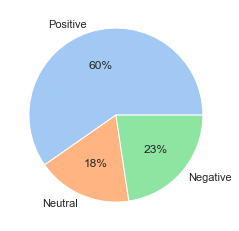

In [110]:
plt.pie(topic_1_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

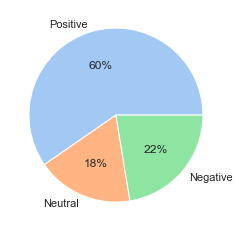

In [111]:
plt.pie(topic_2_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

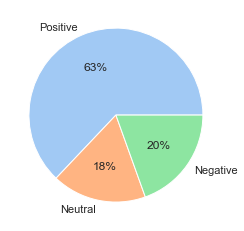

In [112]:
plt.pie(topic_3_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

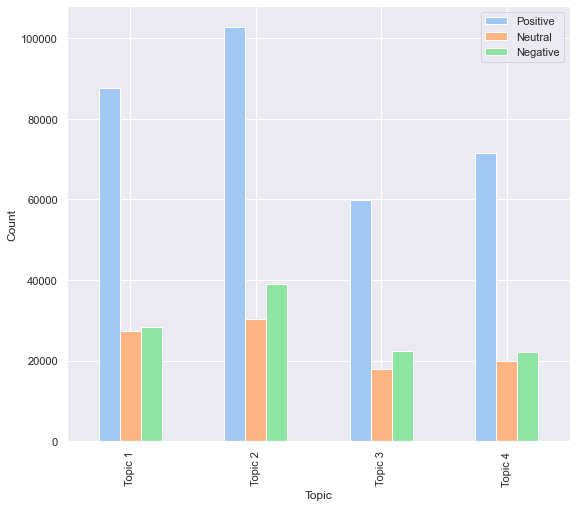

In [113]:
data=[["Topic 1",positive_0,neutral_0,negative_0],
      ["Topic 2",positive_1,neutral_1,negative_1],
      ["Topic 3",positive_2,neutral_2,negative_2],
      ["Topic 4",positive_3,neutral_3,negative_3]
     ]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(9,8))
plt.show()

In [114]:
topic_0_df['published'] = pd.to_datetime(topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
topic_1_df['published'] = pd.to_datetime(topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
topic_2_df['published'] = pd.to_datetime(topic_2_df['published'], format='%d-%m-%Y', errors='coerce')
topic_3_df['published'] = pd.to_datetime(topic_3_df['published'], format='%d-%m-%Y', errors='coerce')

start_20 = datetime.datetime.strptime('01-01-2020', '%d-%m-%Y')
end_20 = datetime.datetime.strptime('31-12-2020', '%d-%m-%Y')

start_21 = datetime.datetime.strptime('01-01-2021', '%d-%m-%Y')
end_21 = datetime.datetime.strptime('31-12-2021', '%d-%m-%Y')

start_22 = datetime.datetime.strptime('01-01-2022', '%d-%m-%Y')
end_22 = datetime.datetime.strptime('31-12-2022', '%d-%m-%Y')


topic_0_2020 = topic_0_df.loc[(topic_0_df['published']>=start_20) & (topic_0_df['published']<= end_20)]
topic_1_2020 = topic_1_df.loc[(topic_1_df['published']>=start_20) & (topic_1_df['published']<= end_20)]
topic_2_2020 = topic_2_df.loc[(topic_2_df['published']>=start_20) & (topic_2_df['published']<= end_20)]
topic_3_2020 = topic_3_df.loc[(topic_3_df['published']>=start_20) & (topic_3_df['published']<= end_20)]

topic_0_2021 = topic_0_df.loc[(topic_0_df['published']>=start_21) & (topic_0_df['published']<= end_21)]
topic_1_2021 = topic_1_df.loc[(topic_1_df['published']>=start_21) & (topic_1_df['published']<= end_21)]
topic_2_2021 = topic_2_df.loc[(topic_2_df['published']>=start_21) & (topic_2_df['published']<= end_21)]
topic_3_2021 = topic_3_df.loc[(topic_3_df['published']>=start_21) & (topic_3_df['published']<= end_21)]

topic_0_2022 = topic_0_df.loc[(topic_0_df['published']>=start_22) & (topic_0_df['published']<= end_22)]
topic_1_2022 = topic_1_df.loc[(topic_1_df['published']>=start_22) & (topic_1_df['published']<= end_22)]
topic_2_2022 = topic_2_df.loc[(topic_2_df['published']>=start_22) & (topic_2_df['published']<= end_22)]
topic_3_2022 = topic_3_df.loc[(topic_3_df['published']>=start_22) & (topic_3_df['published']<= end_22)]

C:\Users\fabia\AppData\Local\Temp/ipykernel_19332/3473039644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_0_df['published'] = pd.to_datetime(topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp/ipykernel_19332/3473039644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_1_df['published'] = pd.to_datetime(topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp/ipykernel_19332/3473039644.py:3: SettingWithCopy

In [115]:
topic_0_2020 = topic_0_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_0_2020['published'] = topic_0_2020['published'].dt.strftime('%d-%m-%Y')
topic_1_2020 = topic_1_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_1_2020['published'] = topic_1_2020['published'].dt.strftime('%d-%m-%Y')
topic_2_2020 = topic_2_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_2_2020['published'] = topic_2_2020['published'].dt.strftime('%d-%m-%Y')
topic_3_2020 = topic_3_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_3_2020['published'] = topic_3_2020['published'].dt.strftime('%d-%m-%Y')

topic_0_2021 = topic_0_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_0_2021['published'] = topic_0_2021['published'].dt.strftime('%d-%m-%Y')
topic_1_2021 = topic_1_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_1_2021['published'] = topic_1_2021['published'].dt.strftime('%d-%m-%Y')
topic_2_2021 = topic_2_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_2_2021['published'] = topic_2_2021['published'].dt.strftime('%d-%m-%Y')
topic_3_2021 = topic_3_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_3_2021['published'] = topic_3_2021['published'].dt.strftime('%d-%m-%Y')

topic_0_2022 = topic_0_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_0_2022['published'] = topic_0_2022['published'].dt.strftime('%d-%m-%Y')
topic_1_2022 = topic_1_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_1_2022['published'] = topic_1_2022['published'].dt.strftime('%d-%m-%Y')
topic_2_2022 = topic_2_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_2_2022['published'] = topic_2_2022['published'].dt.strftime('%d-%m-%Y')
topic_3_2022 = topic_3_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_3_2022['published'] = topic_3_2022['published'].dt.strftime('%d-%m-%Y')

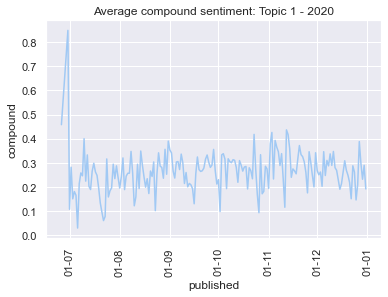

(-4.400034615288996, 0.000296790754888388, 7, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, -433.7254322527547)
0.2649242667806528
     published  compound
0   2020-06-26  0.458000
1   2020-06-30  0.848100
2   2020-07-01  0.108269
3   2020-07-02  0.282139
4   2020-07-03  0.151378
..         ...       ...
181 2020-12-27  0.388251
182 2020-12-28  0.297391
183 2020-12-29  0.232322
184 2020-12-30  0.290075
185 2020-12-31  0.192345

[186 rows x 2 columns]


In [139]:
topic_0_2020['published'] = pd.to_datetime(topic_0_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_0_2020)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 1 - 2020')

plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_0_2020["compound"]))
print(mean(topic_0_2020["compound"]))

print(topic_0_2020)

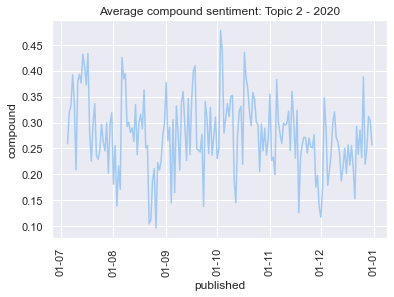

(-6.673555882389542, 4.524154594273789e-09, 1, 182, {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}, -436.58417960116844)
0.27660296771140247


In [141]:
topic_1_2020['published'] = pd.to_datetime(topic_2_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_1_2020)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 2 - 2020')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_1_2020["compound"]))
print(mean(topic_1_2020["compound"]))

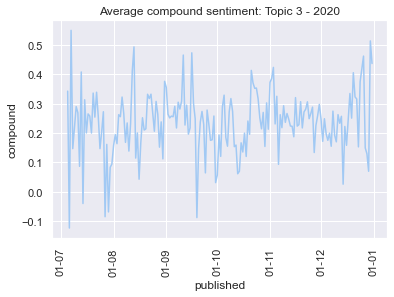

(-4.65859197594953, 0.00010058982092202758, 4, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, -300.07266888632455)
0.23665907922738547
    published  compound  anomaly_points
1  2020-07-06 -0.123567       -0.123567
22 2020-07-27 -0.084980       -0.084980
24 2020-07-29 -0.068606       -0.068606
76 2020-09-19 -0.087951       -0.087951


In [142]:
topic_2_2020['published'] = pd.to_datetime(topic_2_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_2_2020)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 3 - 2020')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_2_2020["compound"]))
print(mean(topic_2_2020["compound"]))

lower_bond = -0.05

res = topic_2_2020["compound"]
topic_2_2020["anomaly_points"] = res[res < lower_bond]

topic_2_2020_outlier = topic_2_2020[topic_2_2020['anomaly_points'].notna()]

print(topic_2_2020_outlier)




In [146]:
print(topic_2_df.to_csv("topic2.csv"))

None


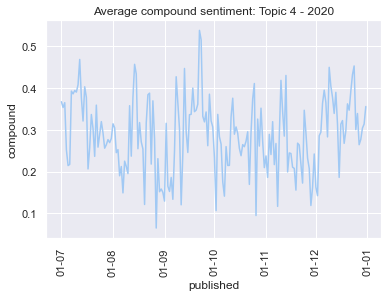

(-8.397161617634314, 2.2825743138870624e-13, 0, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, -373.9345451270501)
0.2874357765798176


In [143]:
topic_3_2020['published'] = pd.to_datetime(topic_3_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_3_2020)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 4 - 2020')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_3_2020["compound"]))
print(mean(topic_3_2020["compound"]))

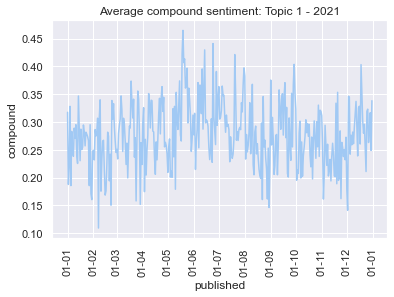

(-7.212291879486613, 2.2186874520026686e-10, 2, 362, {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}, -1032.5282853074423)
0.27802035359686295


In [129]:
plot = sns.lineplot(x="published", y="compound", data=topic_0_2021)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 1 - 2021')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_0_2021["compound"]))
print(mean(topic_0_2021["compound"]))


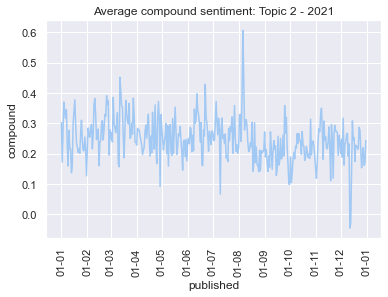

Empty DataFrame
Columns: [published, compound, anomaly_points]
Index: []
(-7.748033959480662, 1.0195149559902862e-11, 2, 362, {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}, -930.336224572889)
0.247589784505128


In [148]:
plot = sns.lineplot(x="published", y="compound", data=topic_1_2021)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 2 - 2021')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = topic_1_2021["compound"]
topic_1_2021["anomaly_points"] = res[res < lower_bond]

topic_1_2021_outlier = topic_1_2021[topic_1_2021['anomaly_points'].notna()]

print(topic_1_2021_outlier)


print(adfuller(topic_1_2021["compound"]))
print(mean(topic_1_2021["compound"]))

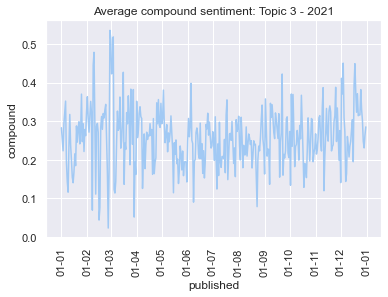

(-13.916142596729177, 5.39919618524752e-26, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, -827.4796465285308)
0.25745444131963346


In [26]:
plot = sns.lineplot(x="published", y="compound", data=topic_2_2021)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 3 - 2021')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_2_2021["compound"]))
print(mean(topic_2_2021["compound"]))

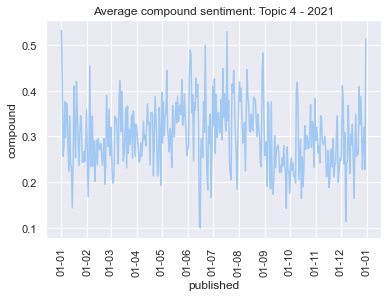

(-2.3155750823046097, 0.16699389057370828, 16, 348, {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}, -892.823967562178)
0.30110891672748336


In [27]:
plot = sns.lineplot(x="published", y="compound", data=topic_3_2021)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 4 - 2021')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_3_2021["compound"]))
print(mean(topic_3_2021["compound"]))

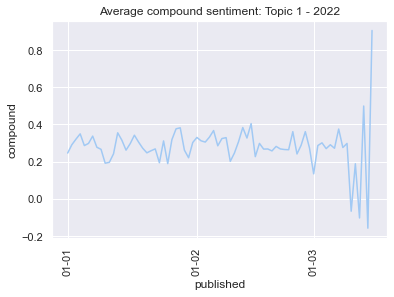

     published  compound  anomaly_points
68  10-03-2022 -0.066433       -0.066433
70  12-03-2022 -0.102600       -0.102600
72  14-03-2022 -0.157467       -0.157467
(-4.684205212064772, 9.009396656678903e-05, 4, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, -120.44430961180154)
0.28262137203593823


In [149]:
plot = sns.lineplot(x="published", y="compound", data=topic_0_2022)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 1 - 2022')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = topic_0_2022["compound"]
topic_0_2022["anomaly_points"] = res[res < lower_bond]

topic_0_2022_outlier = topic_0_2022[topic_0_2022['anomaly_points'].notna()]

print(topic_0_2022_outlier)

print(adfuller(topic_0_2022["compound"]))
print(mean(topic_0_2022["compound"]))

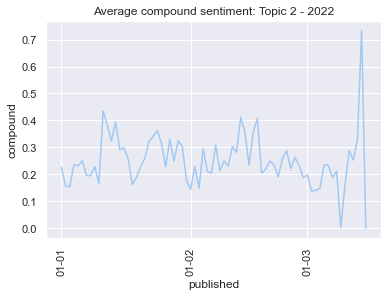

(-2.8200317959512398, 0.055468849989196586, 5, 68, {'1%': -3.530398990560757, '5%': -2.9050874099328317, '10%': -2.5900010121107266}, -105.83548158233907)
0.25123483485567083


In [151]:
plot = sns.lineplot(x="published", y="compound", data=topic_1_2022)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 2 - 2022')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()


print(adfuller(topic_1_2022["compound"]))
print(mean(topic_1_2022["compound"]))

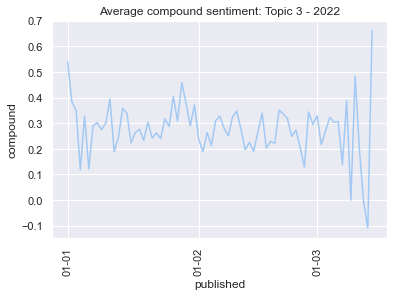

     published  compound  anomaly_points
71  13-03-2022  -0.10965        -0.10965
(-3.5362532687029575, 0.0071034101791226465, 3, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, -91.99048623866116)
0.2781245422230412


In [152]:
plot = sns.lineplot(x="published", y="compound", data=topic_2_2022)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 3 - 2022')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = topic_2_2022["compound"]
topic_2_2022["anomaly_points"] = res[res < lower_bond]

topic_2_2022_outlier = topic_2_2022[topic_2_2022['anomaly_points'].notna()]

print(topic_2_2022_outlier)

print(adfuller(topic_2_2022["compound"]))
print(mean(topic_2_2022["compound"]))

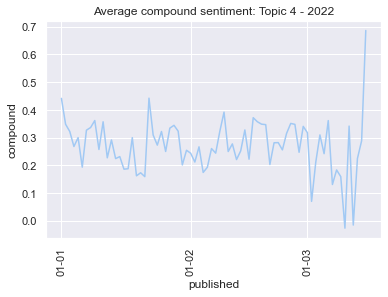

(-6.477342924382647, 1.3210723859829995e-08, 0, 73, {'1%': -3.5232835753964475, '5%': -2.902030597326081, '10%': -2.5883710883843123}, -100.78790891872967)
0.2717693243136505


In [154]:
plot = sns.lineplot(x="published", y="compound", data=topic_3_2022)
plt.xticks(rotation=90)
plt.title('Average compound sentiment: Topic 4 - 2022')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_3_2022["compound"]))
print(mean(topic_3_2022["compound"]))

In [162]:
merged_comments_grouped = merged_comments.groupby(['sentiment']).size()

positive_total = merged_comments_grouped['Positive']


neutral_total = merged_comments_grouped['Neutral']


negative_total = merged_comments_grouped['Negative']


topic_labels = ['Positive', 'Neutral', 'Negative' ]
topic_total_data = [positive_total, neutral_total, negative_total]


sentiment
Negative    112674
Neutral      96180
Positive    323670
dtype: int64


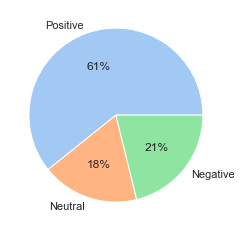

In [163]:
print(merged_comments_grouped)
plt.pie(topic_total_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

In [217]:
def word_count(row):
    split = row["comment"].split(" ")
    return len(split)

merged_comments["words_in_comment"] = merged_comments.apply (lambda row: word_count(row), axis=1)

negative_comments = merged_comments.loc[(merged_comments['sentiment'] == "Negative") & (merged_comments['words_in_comment'] >= 100)]

print(negative_comments["comment"])

3         Erinnert mich an eine persönliche Geschichte d...
7         Ich würde es mir auch als Nicht Premium Herste...
14        <a href="https://www.youtube.com/watch?v=kjwiF...
49        Hallo, Ich hatte ein Lade Problem mit meinem E...
50        Hallo aufgrund deines Hintergründe musste ich ...
                                ...                        
532046    Interessanter Beitrag und verständlich erklärt...
532047    Wie hoch sind denn die Verluste bei Beladung d...
532282    Die Ladezeiten sind völlig in Ordnung? Das ist...
532508    Hallo Nils,<br>gutes Video und eine schöne Anl...
532522    Du sagst in deinen Videos immer wieder, das da...
Name: comment, Length: 8597, dtype: object


In [218]:
negative_comments.to_csv("negative_comments-min_100words.csv")